In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
import mplcyberpunk
import dataframe_image as dfi

plt.style.use("cyberpunk")

In [2]:
os.chdir('C:/Users/jean_/dev/github/EDA/Documents/database')
diretorio_atual = os.getcwd()

df_amzn = pd.DataFrame(pd.read_csv("amazon_books_eda.csv", sep = ",", decimal = "."))

In [3]:
df_amzn

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction
...,...,...,...,...,...,...,...
695,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,20920,9,2022,Fiction
696,Ugly Love: A Novel,Colleen Hoover,4.7,33929,10,2022,Fiction
697,Verity,Colleen Hoover,4.6,71826,11,2022,Fiction
698,What to Expect When You're Expecting,Heidi Murkoff,4.8,27052,13,2022,Non Fiction


In [4]:
df_amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


In [5]:
df_amzn.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [6]:
df_amzn.duplicated().any()

False

In [7]:
df_amzn_sem_string = df_amzn.drop(columns = ['Name', 'Author', 'Genre'], axis = 1)

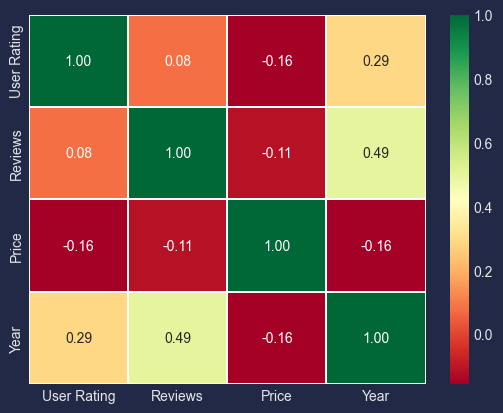

In [8]:
fig, ax = plt.subplots()
ax = sns.heatmap(data = df_amzn_sem_string.corr(), annot = True, linewidths = .3, cmap = "RdYlGn", fmt = '.2f')
plt.show()

In [9]:
df_amzn_genre_counts = df_amzn.groupby(['Genre', 'Year']).size().reset_index(name = 'Counts')
df_amzn_genre_counts

,Genre,Year,Counts
0,Fiction,2009,24
1,Fiction,2010,20
2,Fiction,2011,21
3,Fiction,2012,21
4,Fiction,2013,24
5,Fiction,2014,29
6,Fiction,2015,17
7,Fiction,2016,19
8,Fiction,2017,24
9,Fiction,2018,21


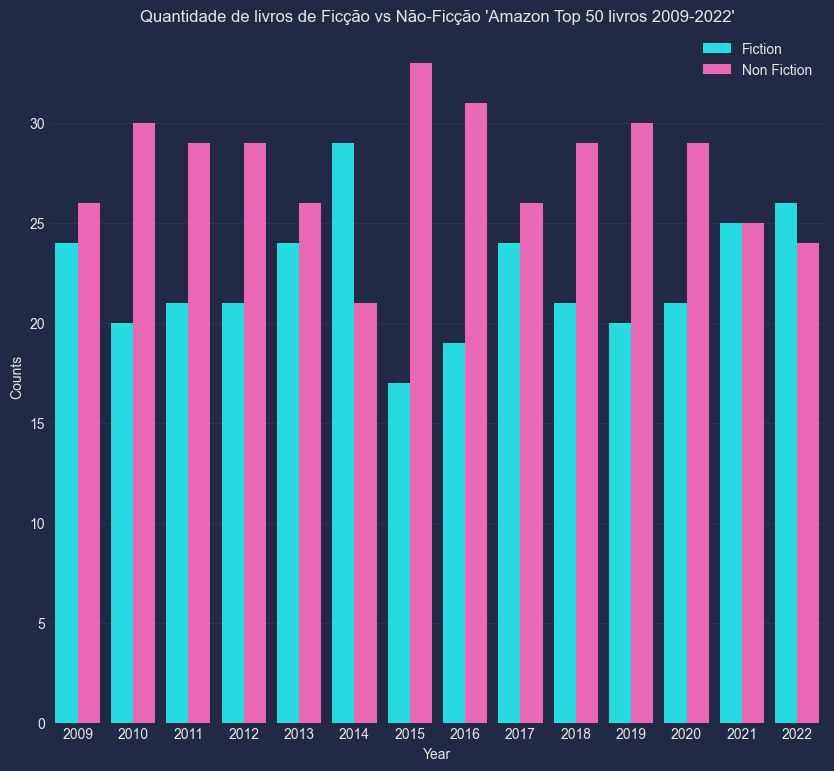

In [10]:
fig, ax = plt.subplots(figsize = (10, 9))
ax = sns.barplot(data = df_amzn_genre_counts, x = 'Year', y = 'Counts', hue = 'Genre')
plt.title("Quantidade de livros de Ficção vs Não-Ficção 'Amazon Top 50 livros 2009-2022'")
plt.legend()
plt.show()

<Axes: ylabel='Counts'>

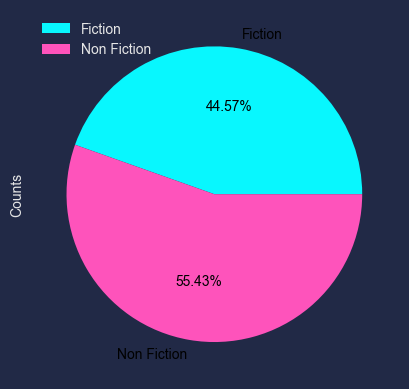

In [11]:
df_amzn_genre_counts.groupby(['Genre']).sum().plot(kind = 'pie', y = 'Counts', autopct = '%.2f%%', textprops={'color':"black"})

In [12]:
df_top_10_author = df_amzn.groupby('Author').size().reset_index(name = 'Counts').sort_values(by = 'Counts', ascending = False, ignore_index = True).head(10)
df_top_10_author

,Author,Counts
0,Gary Chapman,14
1,Jeff Kinney,14
2,Suzanne Collins,12
3,American Psychological Association,11
4,Rick Riordan,11
5,Eric Carle,10
6,Dr. Seuss,10
7,Dav Pilkey,9
8,Gallup,9
9,Don Miguel Ruiz,9


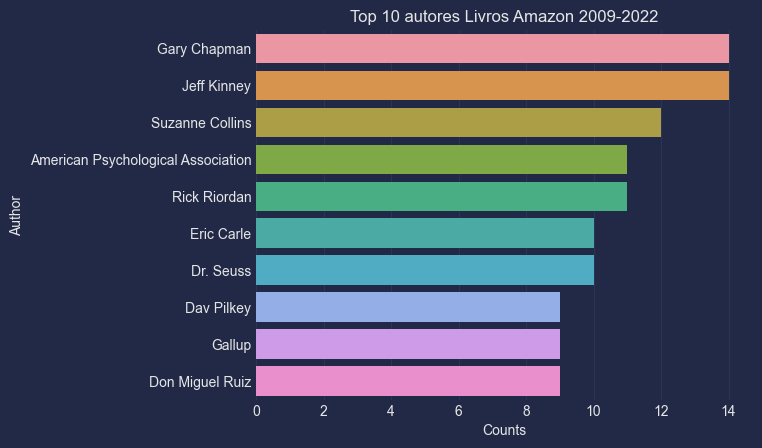

In [13]:
fig, ax = plt.subplots()
ax = sns.barplot(data = df_top_10_author, x = 'Counts', y = 'Author')
plt.title('Top 10 autores Livros Amazon 2009-2022')
plt.show()

In [14]:
df_top_10_author_mean_rating = df_amzn.groupby('Author')['User Rating'].mean().reset_index(name = 'User Rating').sort_values(by = 'User Rating', ascending = False, ignore_index = True).head(10)
df_top_10_author_mean_rating

,Author,User Rating
0,Jill Twiss,4.9
1,Amelia Hepworth,4.9
2,Sherri Duskey Rinker,4.9
3,Dav Pilkey,4.9
4,Sarah Young,4.9
5,Chip Gaines,4.9
6,Deborah Hopkinson,4.9
7,Rush Limbaugh,4.9
8,Emily Winfield Martin,4.9
9,Eric Carle,4.9


In [15]:
# dfi.export(df_top_10_author_review, 'table.png')

In [16]:
df_merge_1 = pd.merge(df_top_10_author, df_top_10_author_mean_rating, on = 'Author', how = 'inner')
df_merge_1

,Author,Counts,User Rating
0,Eric Carle,10,4.9
1,Dav Pilkey,9,4.9


In [17]:
# dfi.export(df_merge_1, 'merge.png')

In [18]:
df_top_10_author_sum_review = df_amzn.groupby('Author')['Reviews'].sum().reset_index(name = 'Sum Reviews').sort_values(by = 'Sum Reviews', ignore_index = True, ascending = False).head(10)
df_top_10_author_sum_review

,Author,Sum Reviews
0,Delia Owens,505673
1,Don Miguel Ruiz,367242
2,Gary Chapman,333346
3,Colleen Hoover,331668
4,Suzanne Collins,322074
5,Matt Haig,288627
6,Charlie Mackesy,281247
7,Eric Carle,278602
8,Dale Carnegie,247571
9,Michelle Obama,241033
